In [233]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

In [234]:
loan_data = pd.read_csv(r"C:\Users\User\Downloads\loans_full_schema.csv")

In [235]:
loan_data.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


# Size of the dataset

In [236]:
loan_data.shape #Data Consists of 10k rows with 55 variables

(10000, 55)

In [237]:
l_df = loan_data[loan_data.duplicated()]
print("Number of duplicate rows:" , l_df.shape)

Number of duplicate rows: (0, 55)


Data Description : The dataset consists of 10k rows with 55 features describing different features that are involved in availing a loan. It consists of object, float and integer datatypes. The dataset does not contain any dupicate value though it consists missing and NAN values. These values need to be handled for this data to be used to develop a prediction model. 

In [238]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

# The above output indicates that there are about 5 columns that have more than 60% of missing data values 

# Handling Missing Values

In [239]:
perc = 60.0
min_count =  int(((100-perc)/100)*loan_data.shape[0] + 1)
loan_df = loan_data.dropna( axis=1,thresh=min_count)

In [240]:
loan_df['emp_title'].fillna(loan_df['emp_title'].mode()[0], inplace = True)
#loan_df.apply(lambda x: x.fillna(x.mean())) 
loan_df = loan_df[loan_df['emp_length'].notna()]
loan_df = loan_df[loan_df['num_accounts_120d_past_due'].notna()]
loan_df = loan_df[loan_df['months_since_last_credit_inquiry'].notna()]
loan_df = loan_df[loan_df['debt_to_income'].notna()]
loan_df["months_since_last_delinq"].fillna(loan_df["months_since_last_delinq"].mean(), inplace=True)

print(loan_df.isna().sum())

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_

In [241]:
#This indicates no duplicate values are present
loan_rows_df = loan_df[loan_df.duplicated()]
loan_rows_df.shape

(0, 51)

# Encoding of categorical variable

In [242]:
obj_df = loan_df.select_dtypes(include=['object']).copy()
obj_df.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [243]:
from sklearn.preprocessing import LabelEncoder

cat_list=["emp_title","state","homeownership","verified_income","loan_purpose","application_type","grade","sub_grade","issue_month","loan_status","initial_listing_status","disbursement_method"]

for i in cat_list:
    le = LabelEncoder()
    encoded = le.fit_transform(loan_df[i])
    loan_df[i] = encoded
    
for i in cat_list:
    #loan_df.i=pd.Categorical(loan_df.i)
    loan_df[i] = loan_df[i].astype('category')

In [244]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7772 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   emp_title                         7772 non-null   category
 1   emp_length                        7772 non-null   float64 
 2   state                             7772 non-null   category
 3   homeownership                     7772 non-null   category
 4   annual_income                     7772 non-null   float64 
 5   verified_income                   7772 non-null   category
 6   debt_to_income                    7772 non-null   float64 
 7   delinq_2y                         7772 non-null   int64   
 8   months_since_last_delinq          7772 non-null   float64 
 9   earliest_credit_line              7772 non-null   int64   
 10  inquiries_last_12m                7772 non-null   int64   
 11  total_credit_lines                7772 non-null   int64 

In [245]:
loan_df.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,7772.000000,7.772000e+03,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7.772000e+03,...,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000
mean,5.904143,8.343118e+04,19.166418,0.211400,36.987069,2001.741122,2.267499,23.552367,11.809573,1.963170e+05,...,0.126994,16551.769171,43.423572,12.541297,481.174720,14572.673439,2585.706060,1972.202495,613.406481,0.097072
std,3.696113,6.873102e+04,14.784109,0.666849,14.458076,7.406424,2.447463,12.087431,5.936439,1.941324e+05,...,0.339873,10359.342582,11.093788,5.007802,295.289158,10040.869292,4143.667292,4073.753820,525.163430,1.641312
min,0.000000,3.000000e+03,0.000000,0.000000,1.000000,1963.000000,0.000000,2.000000,0.000000,0.000000e+00,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000e+04,11.140000,0.000000,36.987069,1998.000000,1.000000,15.000000,8.000000,5.672075e+04,...,0.000000,8500.000000,36.000000,9.430000,260.180000,6720.632500,947.407500,594.580000,227.580000,0.000000
50%,6.000000,7.000000e+04,17.510000,0.000000,36.987069,2003.000000,2.000000,22.000000,11.000000,1.306010e+05,...,0.000000,15000.000000,36.000000,11.980000,402.080000,12501.870000,1606.275000,1002.135000,459.150000,0.000000
75%,10.000000,1.000000e+05,24.820000,0.000000,36.987069,2006.000000,3.000000,30.000000,15.000000,2.854490e+05,...,0.000000,24000.000000,60.000000,15.050000,650.780000,21142.405000,2669.990000,1715.095000,840.405000,0.000000
max,10.000000,2.300000e+06,469.090000,13.000000,118.000000,2015.000000,26.000000,87.000000,51.000000,3.386034e+06,...,3.000000,40000.000000,60.000000,30.790000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [247]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for i in column:
        if i>upper_limit or i <lower_limit:
            outliers.append(i)
            
    return np.array(outliers)

for i in loan_df.columns:
    print("outlier count in",i,":",len(findoutliers(loan_df.debt_to_income)))

outlier count in emp_title : 167
outlier count in emp_length : 167
outlier count in state : 167
outlier count in homeownership : 167
outlier count in annual_income : 167
outlier count in verified_income : 167
outlier count in debt_to_income : 167
outlier count in delinq_2y : 167
outlier count in months_since_last_delinq : 167
outlier count in earliest_credit_line : 167
outlier count in inquiries_last_12m : 167
outlier count in total_credit_lines : 167
outlier count in open_credit_lines : 167
outlier count in total_credit_limit : 167
outlier count in total_credit_utilized : 167
outlier count in num_collections_last_12m : 167
outlier count in num_historical_failed_to_pay : 167
outlier count in current_accounts_delinq : 167
outlier count in total_collection_amount_ever : 167
outlier count in current_installment_accounts : 167
outlier count in accounts_opened_24m : 167
outlier count in months_since_last_credit_inquiry : 167
outlier count in num_satisfactory_accounts : 167
outlier count in 

# Data Visualizations

<Figure size 864x720 with 0 Axes>

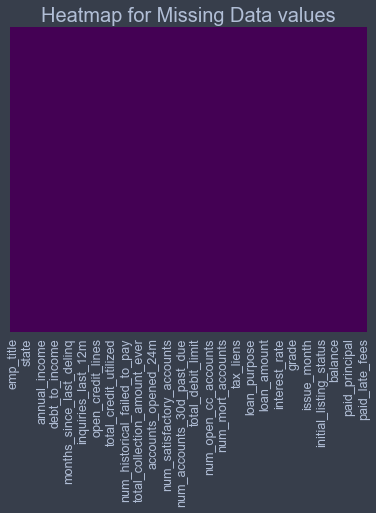

<Figure size 864x720 with 0 Axes>

In [248]:
sn.heatmap(loan_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap for Missing Data values', fontsize=20)
plt.figure(figsize=(12,10))

Data Cleaning :
The following steps were taken to clean the dataset:
    1)All those columns that had more than 60% of the data missing were removed.
    2)All those columns that were of type object were encoded into numeric values and then converted to category type.    

<Figure size 1008x576 with 0 Axes>

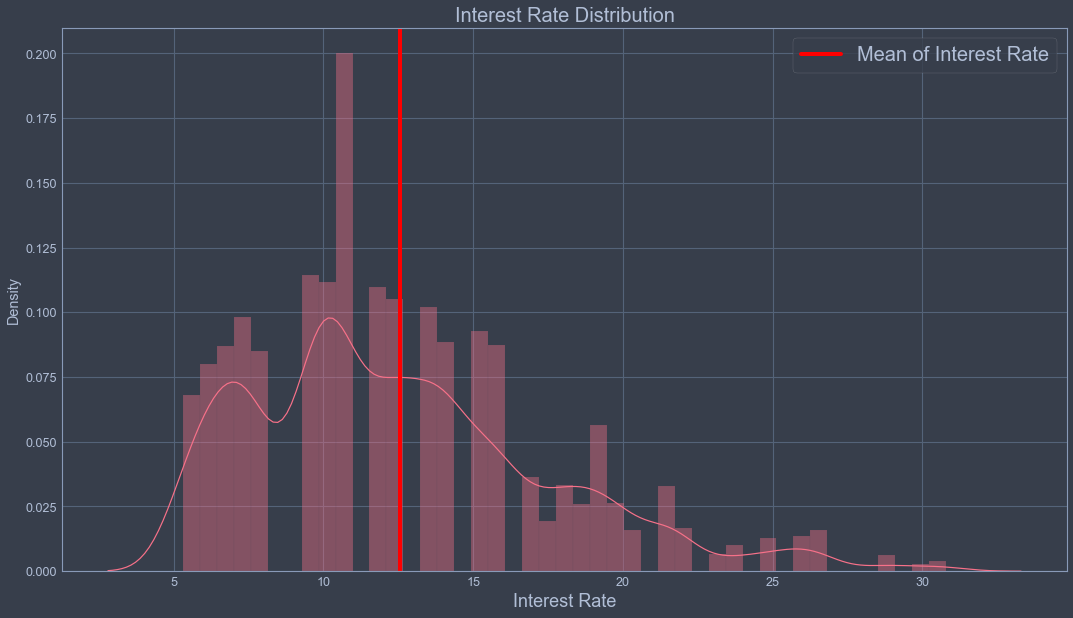

In [249]:
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sn.set_palette("husl")
plt.figure(figsize=(18,10))
sn.distplot(loan_df['interest_rate'], hist='density')
plt.axvline(x=loan_df.interest_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

No handles with labels found to put in legend.


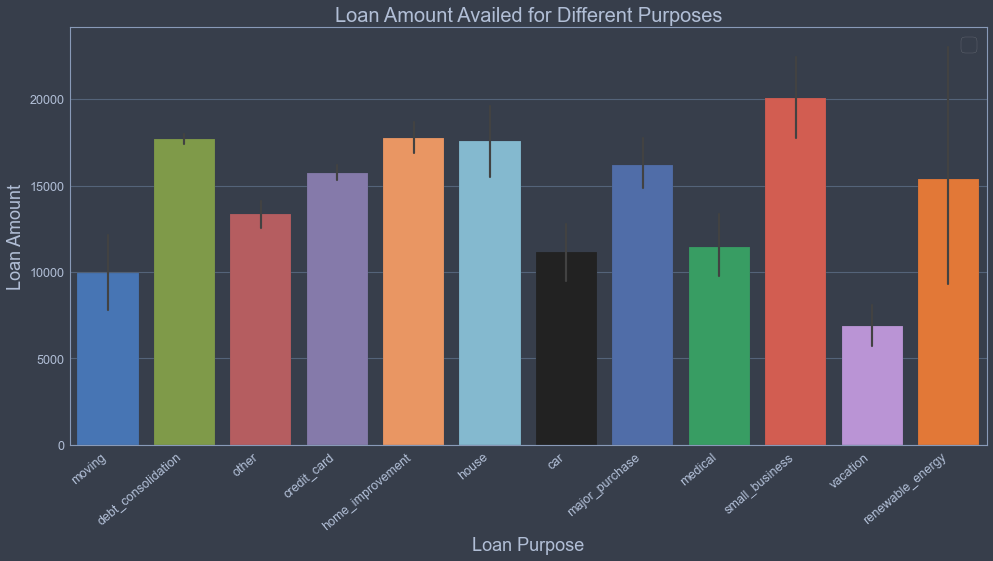

In [250]:
plt.figure(figsize=(14,8))
jtplot.style(theme='onedork')
ax=sn.barplot(obj_df.loan_purpose, loan_df.loan_amount)

plt.title('Loan Amount Availed for Different Purposes', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=18)
plt.ylabel('Loan Amount', fontsize=18)
plt.legend(fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


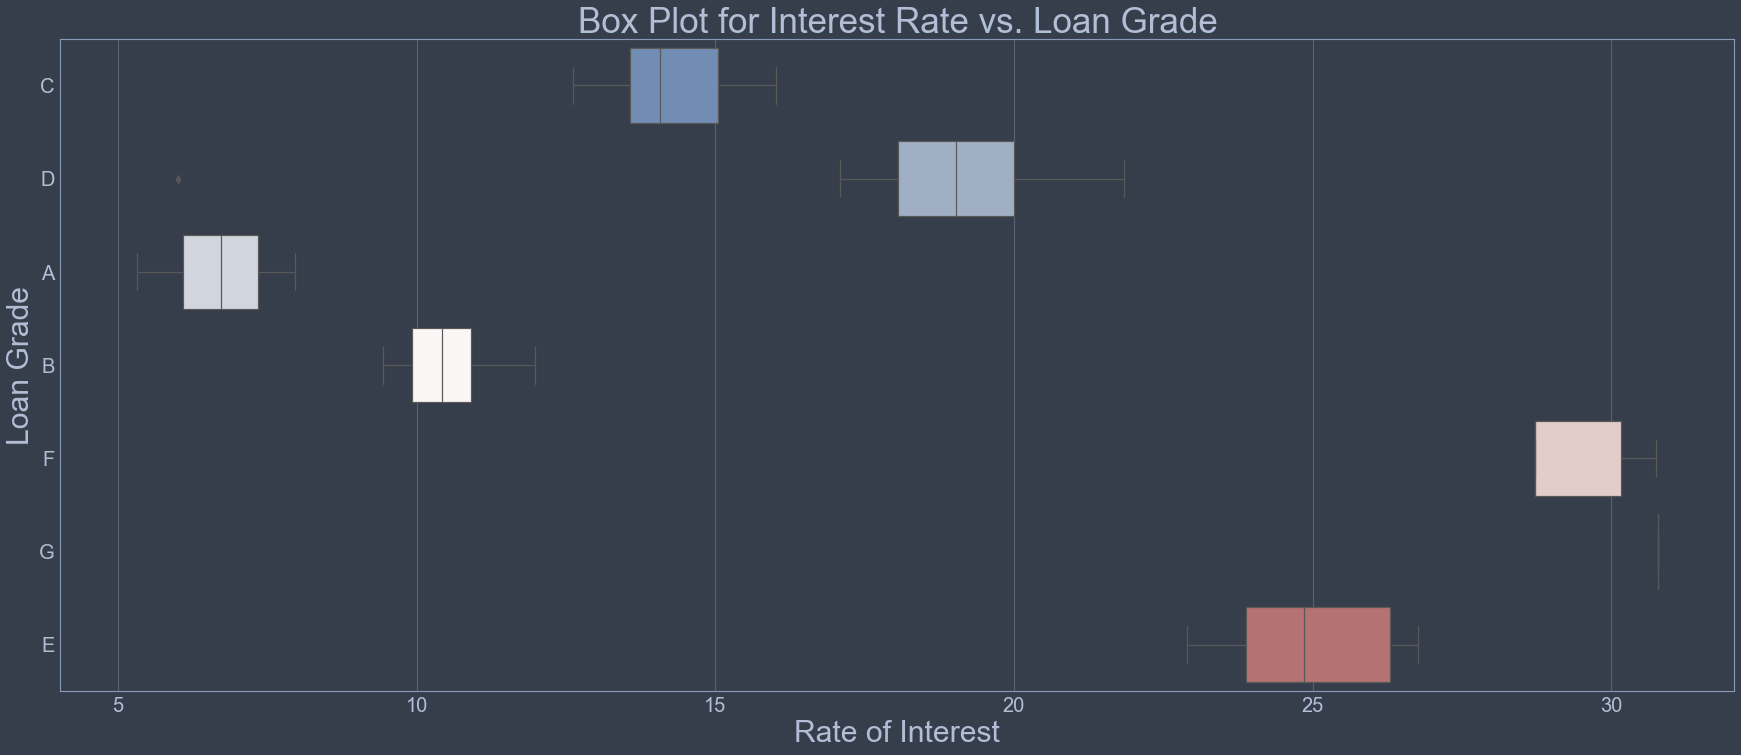

In [251]:
plt.figure(figsize=(30,12))
sn.boxplot(x=loan_df.interest_rate, y=obj_df.grade, palette="vlag")
plt.title('Box Plot for Interest Rate vs. Loan Grade', fontsize=35)
plt.xlabel('Rate of Interest', fontsize=30)
plt.ylabel('Loan Grade', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

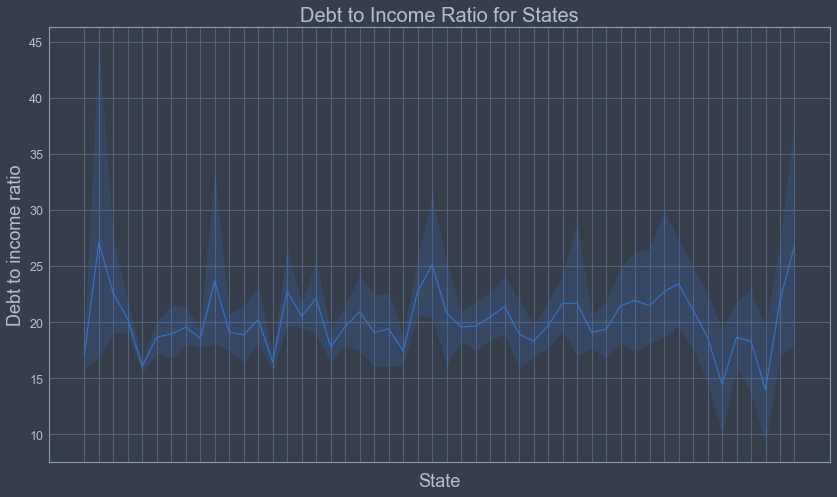

In [292]:
plt.figure(figsize=(14,8))
jtplot.style(theme='onedork')
ax=sn.lineplot(obj_df.state, loan_df.debt_to_income)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)

plt.title('Debt to Income Ratio for States', fontsize=20)
plt.xlabel('State', fontsize=18)
plt.ylabel('Debt to income ratio', fontsize=18)


plt.show()


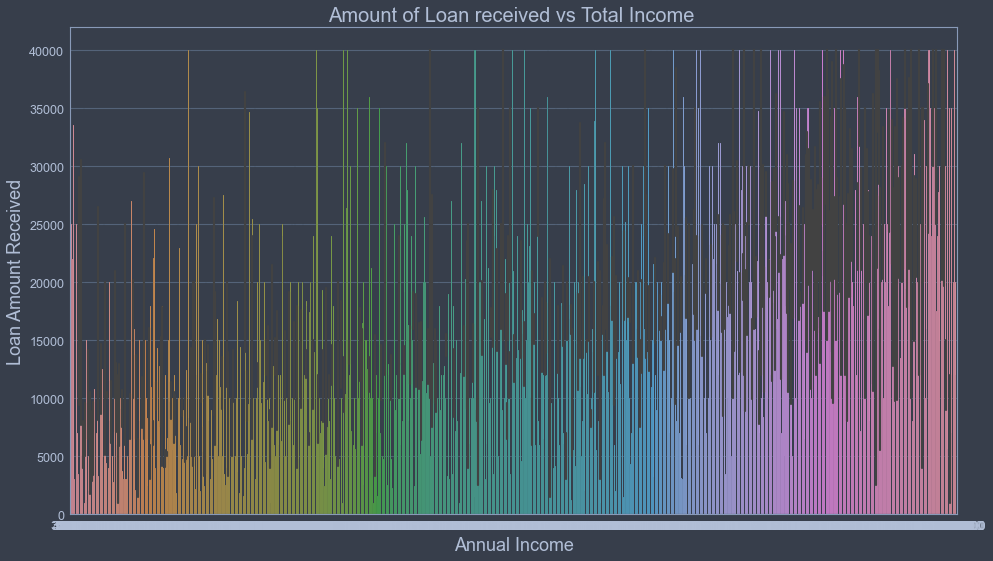

In [293]:
plt.figure(figsize=(14,8))
jtplot.style(theme='onedork')
ax=sn.barplot(loan_df.annual_income, loan_df.loan_amount)

plt.title('Amount of Loan received vs Total Income ', fontsize=20)
plt.xlabel('Annual Income', fontsize=18)
plt.ylabel('Loan Amount Received', fontsize=18)
plt.tight_layout()
plt.show()

Visualizations: 5 visualizations were made to determine the interest rate distribution, loan amount availed for different purposes, how the interest rate varies with the loan grade, debt to income ratio of different states and the relationship between the loan amount received and the annual income of applicants.

# Feature Selection & Machine Learning Model

In [254]:
#Identifying the target and feature variables
target=loan_df["interest_rate"]
loan_features=loan_df.drop(columns=["interest_rate"])
loan_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7772 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   emp_title                         7772 non-null   category
 1   emp_length                        7772 non-null   float64 
 2   state                             7772 non-null   category
 3   homeownership                     7772 non-null   category
 4   annual_income                     7772 non-null   float64 
 5   verified_income                   7772 non-null   category
 6   debt_to_income                    7772 non-null   float64 
 7   delinq_2y                         7772 non-null   int64   
 8   months_since_last_delinq          7772 non-null   float64 
 9   earliest_credit_line              7772 non-null   int64   
 10  inquiries_last_12m                7772 non-null   int64   
 11  total_credit_lines                7772 non-null   int64 

In [255]:
loan_features=loan_features.drop(columns=["emp_title","emp_length","inquiries_last_12m","issue_month","loan_status"])

In [256]:
loan_features=loan_features.drop(columns=["disbursement_method","verified_income","num_accounts_30d_past_due"])

In [258]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(loan_features, target, test_size=0.3, random_state=40) 

In [260]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [261]:
print(lm.intercept_)


7.735762310548131


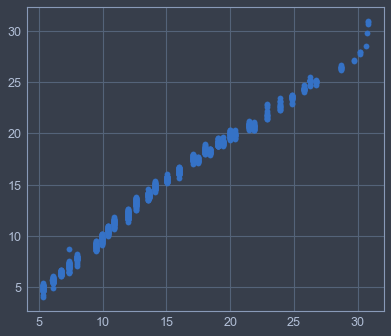

In [264]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)


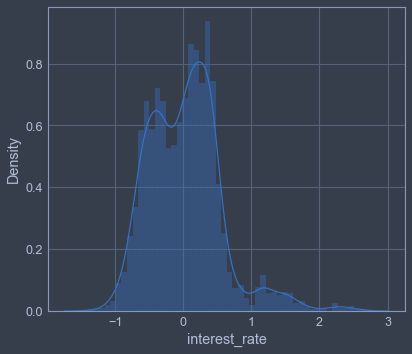

In [265]:
sn.distplot((y_test-predictions),bins=50);


In [278]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

lin_mae=metrics.mean_absolute_error(y_test, predictions)
lin_mse=metrics.mean_squared_error(y_test, predictions)
lin_rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))

MAE: 0.4188522522316907
MSE: 0.298037318750252
RMSE: 0.5459279428186947


In [275]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=45, max_depth=10, random_state=0)
rfg.fit(X_train, y_train)

y_pred=rfg.predict(X_test)

In [279]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

reg_mae=metrics.mean_absolute_error(y_test, y_pred)
reg_mse=metrics.mean_squared_error(y_test, y_pred)
reg_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.03279421735683258
Mean Squared Error: 0.018933193685937606
Root Mean Squared Error: 0.1375979421573506


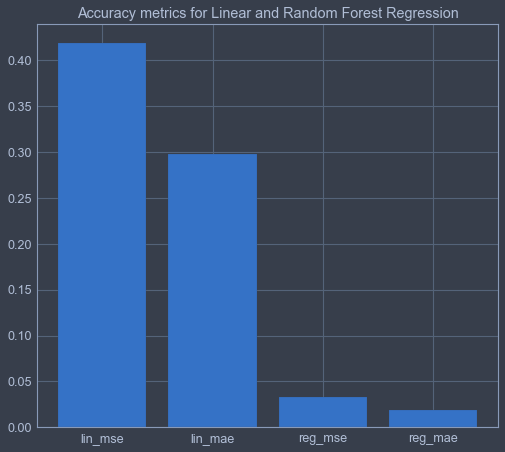

In [287]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['lin_mse', 'lin_mae', 'reg_mse', 'reg_mae']
scores = [lin_mae, lin_mse, reg_mae, reg_mse]
width=0.40
ax.bar(metrics,scores)
plt.title("Accuracy metrics for Linear and Random Forest Regression")
plt.show()

The above two graphs show that the ditribution is linear and normally distributed indicating that the Linear Regression model has performed well. The error values observed in both the models is very less indicating good performance. 

Future Work : I would want to use more sophisticated techniques for feature selection and combine more models to improve performance.